In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os 
import pandas as pd 


In [16]:
feature=pd.read_csv("../data/PSM/test.csv")
label=pd.read_csv("../data/PSM/test_label.csv")
df=pd.merge(feature,label)
anoms=df.iloc[:,-1].to_numpy()

<Axes: >

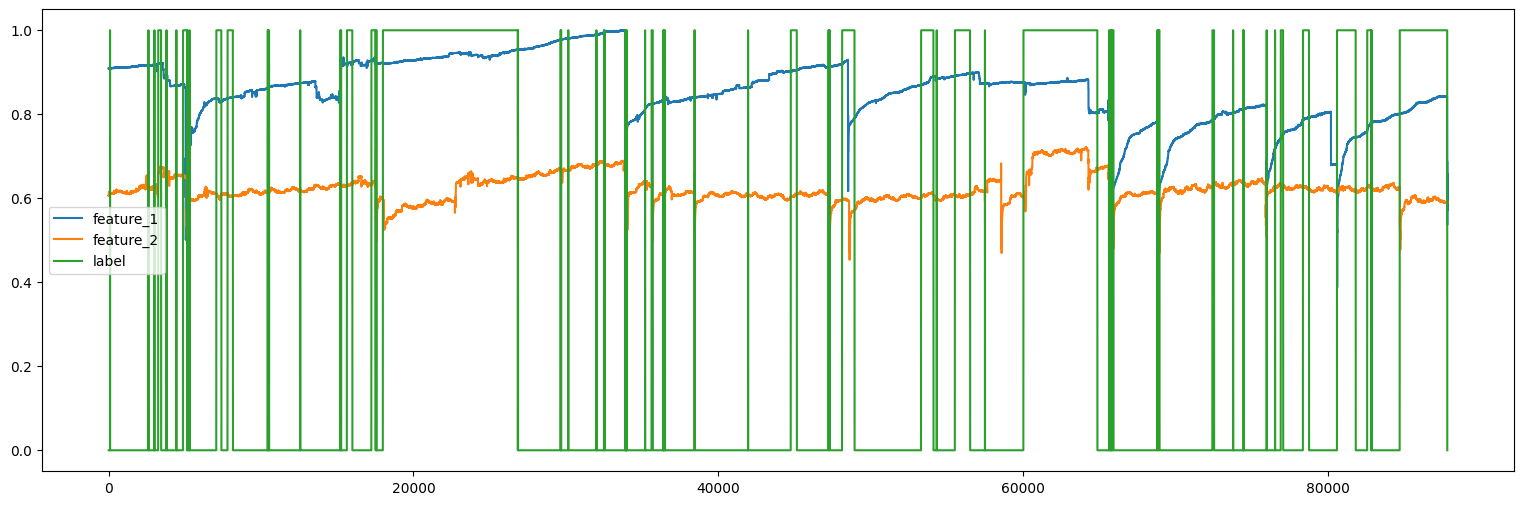

In [15]:
plt.figure(figsize=(19,6))
ax=plt.gca()
df.iloc[:,[2,3,-1]].plot(ax=ax)

In [20]:
#creamos un vector aleatorio que nos de una detección con una prob de 1/100

random_detector=np.random.rand(anoms.shape[0])


In [28]:
is_anom=np.where(random_detector>0.999,1,0)

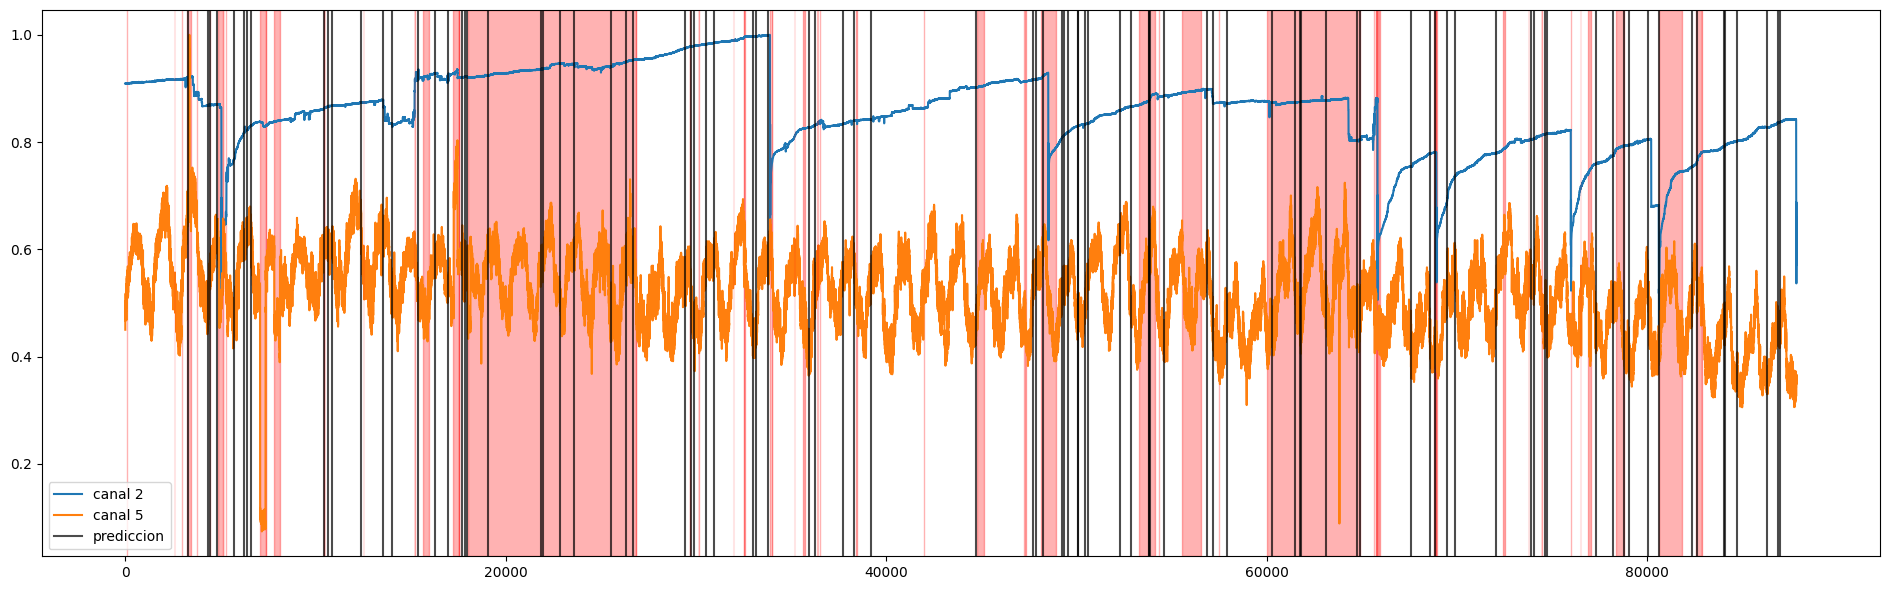

In [64]:
plt.figure(figsize=(19,6))
j=2
aux=df.iloc[:,j].to_numpy()
x=df.iloc[:,j].index.to_numpy()
aux2=df.isna().iloc[:,j]
anom_x=aux2[aux2].index.to_numpy()
plt.plot(aux,label=f"canal {j}")

j=5
aux=df.iloc[:,j].to_numpy()
x=df.iloc[:,j].index.to_numpy()
aux2=df.isna().iloc[:,j]
anom_x=aux2[aux2].index.to_numpy()
plt.plot(aux,label=f"canal {j}")



borken_index=df.loc[df.iloc[:,-1]==1].index.to_numpy()
start=True
init=borken_index[0]
for i in range(len(borken_index)-1):
    if borken_index[i+1]==(1+borken_index[i]):
        pass
    else:
        if init==borken_index[i]:
            plt.axvline(init,alpha=0.1,color="red")
            init=borken_index[i+1]
        else:
            plt.axvspan(init,borken_index[i],alpha=0.3,color="red")
            init=borken_index[i+1]
lebelear=True
for i in np.argwhere(is_anom==1).squeeze():
    if lebelear:
        lebelear=False
        plt.axvline(i,color="black",alpha=0.7,label="prediccion")
    else:
        plt.axvline(i,color="black",alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig("../../../visualizaciones_tfm/PSM_dataset_2.png")

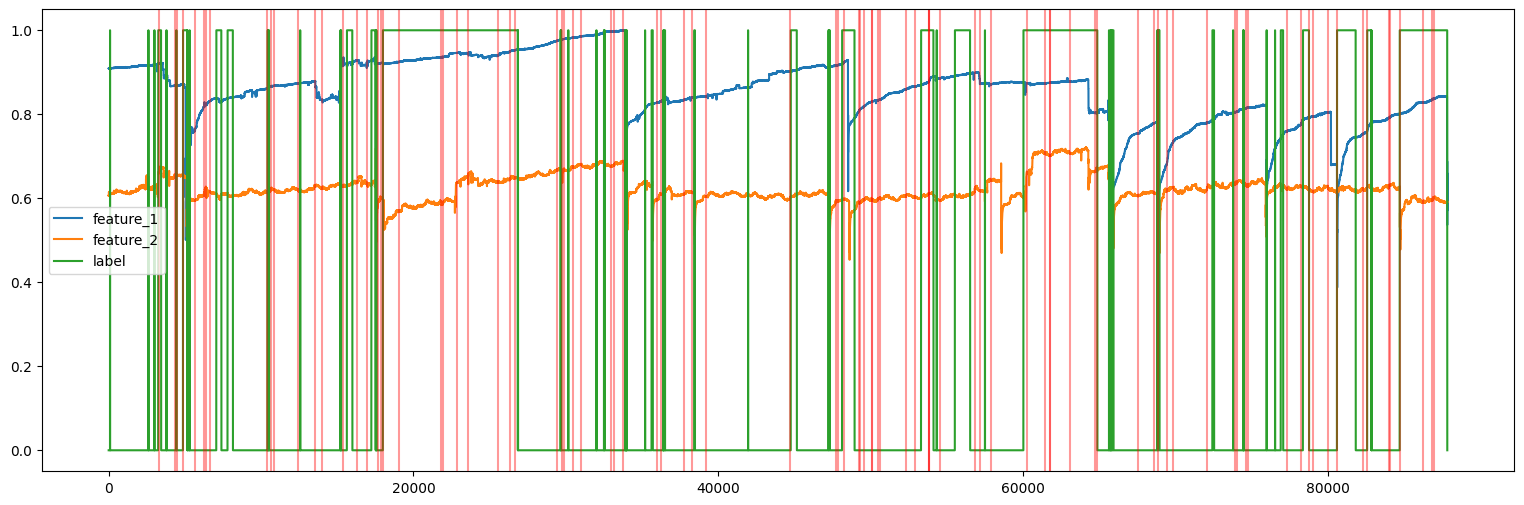

In [29]:
plt.figure(figsize=(19,6))
ax=plt.gca()
df.iloc[:,[2,3,-1]].plot(ax=ax)
for i in np.argwhere(is_anom==1).squeeze():
    ax.axvline(i,color="red",alpha=0.4)

In [67]:
#vamos a dar por bueno todo chunk que acertemos 

indices_coincidencias=np.argwhere(np.logical_and(anoms.astype(bool),is_anom))

In [68]:
#ahora tenemos que sumar los valores de los chuns que he acertado
aciertos=0
bigger_i=0
array_aciertos=np.zeros_like(anoms)
for i in indices_coincidencias.squeeze():
    array_aciertos[i]=1
    if bigger_i>i:
        continue
    aciertos+=1
    go_left=True
    go_right=True
    a=i-1
    while go_left:
        if anoms[a]==1:
            array_aciertos[a]=1
            aciertos+=1
            a-=1

        else:
            go_left=False
    a=i+1
    while go_right:
        if anoms[a]==1:
            array_aciertos[a]=1
            aciertos+=1
            a+=1
            bigger_i=a
        else:
            go_right=False

aciertos

    



20152

In [73]:
#variante sin contarlos varias veces
aciertos=0
bigger_i=0
array_aciertos=np.zeros_like(anoms)
start=True

for i in indices_coincidencias.squeeze():
    array_aciertos[i]=1
    if bigger_i>i:
        continue

    aciertos+=1
    go_left=True
    go_right=True
    a=i-1
    while go_left:
        if anoms[a]==1:
            if start:
                pass
            array_aciertos[a]=1
            a-=1

        else:
            go_left=False
    start=True
    a=i+1
    while go_right:
        if anoms[a]==1:
            if start:
                pass
            array_aciertos[a]=1
            
            a+=1
            bigger_i=a
        else:
            go_right=False
    start=True
aciertos

    



8

In [72]:
anoms.sum()

24381

In [69]:
array_completo=np.logical_or(array_aciertos,is_anom)

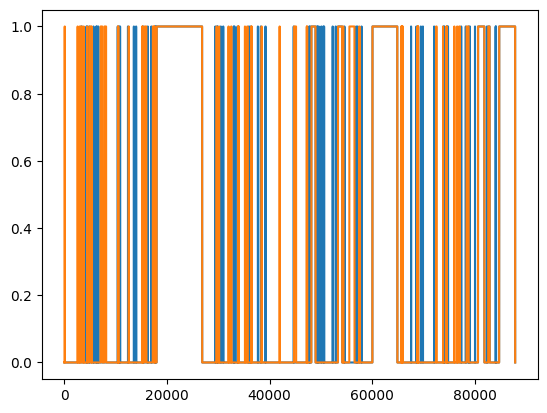

In [70]:
plt.plot(array_completo)
plt.plot(anoms)

In [71]:
np.logical_and(anoms.astype(bool),is_anom).sum()

25

In [53]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(anoms, array_completo)
precision, recall, f_score, support = precision_recall_fscore_support(anoms, array_completo,
                                                                        average='binary')
print(
    "Accuracy : {:0.4f}, Precision : {:0.4f}, Recall : {:0.4f}, F-score : {:0.4f} ".format(
        accuracy, precision,
        recall, f_score))

Accuracy : 0.9511, Precision : 0.9967, Recall : 0.8265, F-score : 0.9037 
